<a href="https://colab.research.google.com/github/rlfwo93/machine-learning/blob/master/tensorflow2.0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
%matplotlib inline 
tf.__version__

'2.3.0'

https://davinci-ai.tistory.com/20  용어개념설명

편향  = 예측 값과 실제 값의 차이

# **Uniform(균일) 분포 난수**
-  균일 분포(uniform distribution)란 최댓값과 최솟값 사이에 있는 모든 수가 나올 확률이 동일한 분포.

In [ ]:
rand = tf.random.uniform([2,2], 0, 1) # 균일 분포의 난수를 취득하는 함수.
# shape[2,2] = return되는 난수의 모양(행,열등)의 차원을 의미함.
# minval  0= 최솟값
# maxvval  1= 최대값

print(rand)

tf.Tensor(
[[0.99350655 0.6061802 ]
 [0.96937835 0.21356452]], shape=(2, 2), dtype=float32)


# **Normal(정규) 분포 난수**
- 정규 분포(normal distribution)는 가운데가 높고 양극단으로 갈수록 낮아지는 분포를 의미




In [ ]:
rand =tf.random.normal([2,2],0,1)
#shape[2,2] = 모양
# mean: 평균값을 의미
# standard deviation: 표준편차를 의미

print(rand)

tf.Tensor(
[[ 0.30616027 -1.3715899 ]
 [-0.42791864 -0.9073538 ]], shape=(2, 2), dtype=float32)


# *MNIST dataset 준비하기*

http://hleecaster.com/ml-normalization-concept/

In [14]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0 # 모든값을 0~1사이로 만들어주는 최소-최대 정규화

print("x_train={0}".format(x_train.shape))
print("y_train={0}".format(y_train.shape))
print("x_test={0}".format(x_test.shape))
print("y_test={0}".format(y_test.shape))

x_train=(60000, 28, 28)
y_train=(60000,)
x_test=(10000, 28, 28)
y_test=(10000,)


n_empty = 0 
<class 'list'>
10
1
10
2
(56, 280)


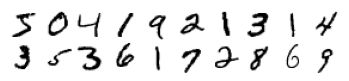

In [51]:
test =x_train[0:20,:]#레이블7의 데이터가 있는 행렬

def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row) # 1  
    images = [instance.reshape(size,size) for instance in instances]
    # ndata[2:3,:].reshape(1,784) 을 (28,28) 로 바꿔줌
    n_rows = (len(instances) - 1) // images_per_row + 1 # 1
  

    row_images = []
    n_empty = n_rows * images_per_row - len(instances) # 0 

    print("n_empty = {0} ".format(n_empty)) # 0
    print(type(images))

    images.append(np.zeros((size, size * n_empty))) 
    
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        print(len(rimages))
        row_images.append(np.concatenate(rimages, axis=1))
        print(len(row_images))
    image_all = np.concatenate(row_images, axis=0)
    print(image_all.shape)
    plt.imshow(image_all, cmap = mpl.cm.binary, **options)
    plt.axis("off")

plot_digits(test)

In [56]:
x_train.shape

(60000, 28, 28)

 0~255사이의 값을 255.0으로 나누게되면 0 ~ 1사이의 값으로 바뀐다. 이것을 Min-Max Normalization 최소-최대 정규화 라고한다.
 
 학습이 더 잘되기 때문에 정규화를 한다.


(X - MIN) / (MAX-MIN) 

In [53]:
model = tf.keras.models.Sequential([ # 데 Sequential 모델은 순차적으로 레이어 층을 더해주기 때문에 순차모델이라고 불림.
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),  # 128은 출력을 나타내줌.
    tf.keras.layers.Dropout(0.2), # 과적합을 피하기위해 
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 함수
- flatten : 1d로 평평하게 펴주는레이어
- Dense : fully connected 레이어. 이전 레이어의 출력과 모든 뉴런들을 연결.
- fully connected : CNN의 종류로써 이미지를 분류/설명하는데 가장 적합하게 예측.
-  Dropout :  regularization을 위해 사용하는 Dropout, 특정 비율로 뉴런을 turn off해서 학습한다.

- Flatten(input_shape=(28,28)) : 28x28 shape의 입력데이터를 28*28 x 1로 변경해준다.


- tf.keras.layers.Flatten(input_shape=(28, 28)) = 받은 데이터를 28x28 형식으로 쫙 펴준다.
- tf.keras.layers.Dense(128, activation='relu') = 128개를 출력한다는 뜻이고, activation은 활성화 레이어라는 뜻이다. 